In [1]:
from datascience import Table
import numpy as np
from path_data_variable import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
    # Whoa

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
# Read two books, fast (again)!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Literary Characters

Quick visual of frequency of mentions of characters in each book.

Text(0.5, 1.08, 'Total Screentime, basically')

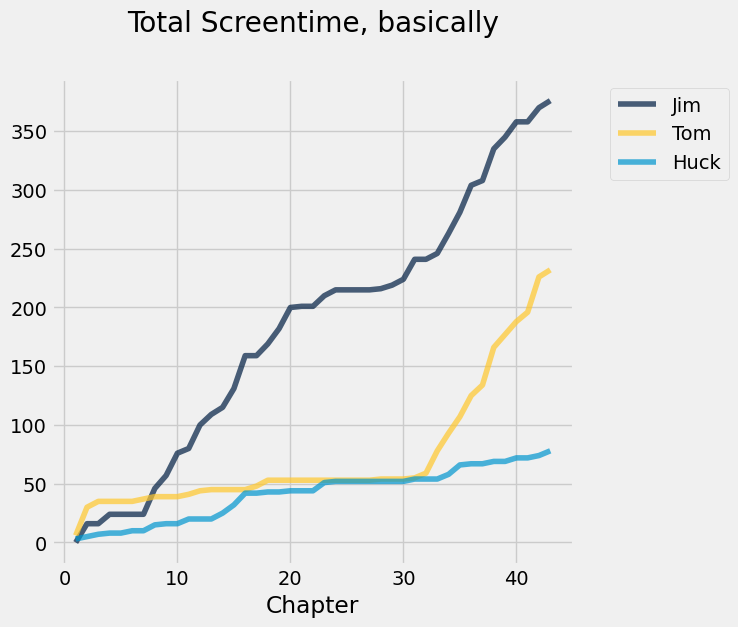

In [ ]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Total Screentime, basically', y=1.08)

In [3]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

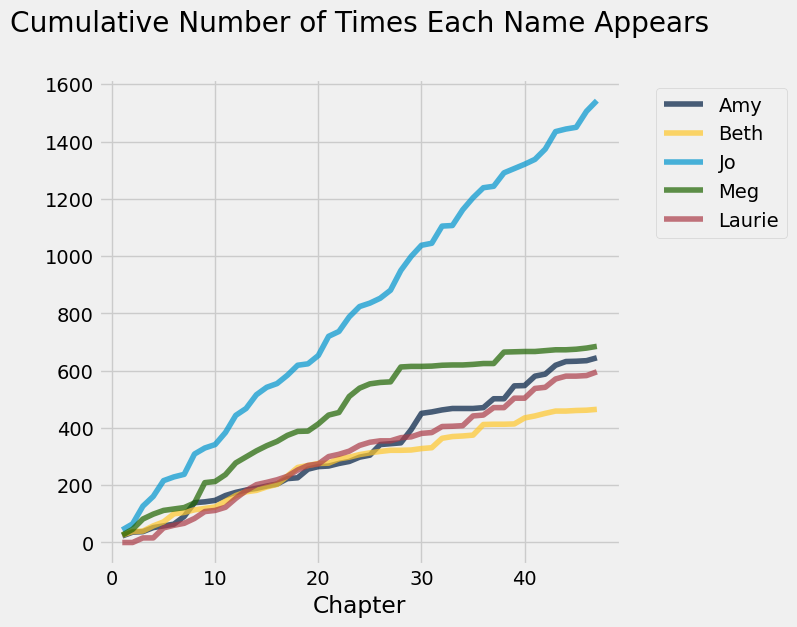

In [5]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

# Laurie is a young man who marries one of the girls in the end. 

# See if you can use the plots to guess which one.